In [1]:
import os
import pandas as pd

In [41]:
corpus = []
y = []
title = []
for file in os.listdir("80-90/"):
    if file[-3:] == "txt" :
        f = open("80-90/"+file,"r",encoding="utf-8")
        corpus.append(f.read())
        y.append("Cyberpunk")
        title.append(file)
        
for file in os.listdir("2000 -/"):
    if file[-3:] == "txt" :
        f = open("2000 -/"+file,"r",encoding="utf-8")
        corpus.append(f.read())
        y.append("Cyberpunk")
        title.append(file)
        
for file in os.listdir("notCyberpunk/"):
    if file[-3:] == "txt" :
        f = open("notCyberpunk/"+file,"r",encoding="utf-8")
        corpus.append(f.read())
        y.append("Autre")
        title.append(file)

In [18]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
from nltk.corpus import stopwords
stwf=stopwords.words('french')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.stem
french_stemmer=nltk.stem.SnowballStemmer('french')
class FrenchStemmedTfidfVectorizer(TfidfVectorizer):#FrenchStemmedTfidVectorizer hérite de TfidVectorizer
    def build_analyzer(self):
        analyzer = super(FrenchStemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: (french_stemmer.stem(w) for w in analyzer(doc))


In [9]:
from collections import Counter

In [10]:
Counter(corpus[0].replace("\n","").split(" "))

Counter({'': 15042,
         'WILLIAM': 1,
         'GIBSON': 1,
         'COMTE': 2,
         'ZÉRO': 3,
         'TRADUIT': 1,
         'DE': 9,
         'L’AMÉRICAINPAR': 1,
         'JEAN': 1,
         'BONNEFOY': 1,
         'ÉDITIONS': 1,
         'J’AI': 1,
         'LU': 1,
         'Collection': 2,
         'créée': 1,
         'et': 1430,
         'dirigéepar': 1,
         'Jacques': 2,
         'Sadoul': 1,
         'Pour': 34,
         'ma': 41,
         'D': 1,
         'Quiero': 1,
         'hacer': 1,
         'contigo': 1,
         'lo': 1,
         'que': 907,
         'la': 2056,
         'primavera': 1,
         'hace': 1,
         'con': 4,
         'los': 1,
         'cerezos.Pablo': 1,
         'NERUDA': 1,
         'COUNT': 1,
         'ZERO': 2,
         'INTERRUPT': 1,
         'OU': 1,
         'INTERRUPTION': 1,
         'PROVOQUÉE': 1,
         'PARUN': 1,
         ':': 83,
         'dès': 9,
         'réception': 1,
         'd’une': 178,
         'commande

In [11]:
ftvectorizer = FrenchStemmedTfidfVectorizer(stop_words=stwf,decode_error='ignore')
X = ftvectorizer.fit_transform(corpus)
dico=ftvectorizer.vocabulary_
Ps=len(dico)
print("taille du vocabulaire après suppression des stop_words : ",Ps)
print(dico)
print('X après TfIdf')
print(X.toarray())

taille du vocabulaire après suppression des stop_words :  29701
{'william': 28605, 'gibson': 11819, 'comt': 6183, 'zéro': 28910, 'traduit': 26875, 'américain': 1818, 'jean': 14590, 'bonnefoy': 3877, 'édit': 29146, 'lu': 16016, 'collect': 5960, 'cré': 7150, 'dirig': 7916, 'jacqu': 14516, 'sadoul': 23787, 'quiero': 21837, 'hac': 12467, 'contigo': 6485, 'lo': 15865, 'primav': 20959, 'con': 6188, 'los': 15959, 'cerezos': 5067, 'pablo': 19262, 'nerud': 18138, 'count': 6840, 'zero': 28827, 'interrupt': 14200, 'provoqu': 21236, 'des': 7625, 'récept': 23429, 'command': 6038, 'décrément': 8655, 'compteur': 6171, 'titr': 26614, 'original': 19015, '1985': 279, 'traduct': 26869, 'français': 11259, 'découvert': 8625, '1986': 280, 'ça': 28965, 'gliss': 11901, 'canon': 4722, 'flanqu': 10929, 'pistard': 20234, 'trouss': 27225, 'turn': 27372, 'vieil': 28121, 'ru': 23312, 'delh': 7523, 'cal': 4564, 'phéromon': 20100, 'couleur': 6833, 'cheveux': 5375, 'rattrap': 22156, 'nomm': 18370, 'chandn': 5160, 'cha

In [144]:
from collections import Counter

In [31]:
df = pd.DataFrame(X.toarray(),columns = dico) 

In [32]:
df["genre"]= y

In [33]:
df.query("genre == 'Cyberpunk'").mean().sort_values(ascending=False).reset_index()[:100]

,index,0
0,rototos,0.128816
1,syndiqu,0.110982
2,fendu,0.091582
3,coalescent,0.077182
4,binomial,0.070011
...,...,...
95,kanit,0.021765
96,vidéotron,0.021612
97,sinn,0.021591
98,nivel,0.021570


In [45]:
df

,william,gibson,comt,zéro,traduit,américain,jean,bonnefoy,édit,lu,...,autodépréci,regrav,sénescent,bicéphal,postulat,magellan,étym,1050,umquam,genre
0,0.000995,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.001146,0.000000,0.000000,0.006141,0.007173,0.000000,0.000000,0.000000,0.000000,Cyberpunk
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.009792,0.010705,0.002942,0.000000,0.000000,0.000000,0.000000,Cyberpunk
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.005202,0.000000,0.000000,0.000000,0.000000,Cyberpunk
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004733,0.000000,0.000000,0.000000,0.000000,Cyberpunk
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.014854,0.004083,0.000000,0.000000,0.000000,0.000000,Cyberpunk
5,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.012612,0.020798,0.000000,0.000000,0.000000,0.000000,Cyberpunk
6,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Cyberpunk
7,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004105,0.000000,0.000000,0.000000,0.000000,Cyberpunk
8,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000510,0.001683,0.000000,0.000000,0.000000,0.000000,Cyberpunk
9,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.007740,0.000000,0.000000,0.000000,0.000000,Cyberpunk


In [47]:
df.query("genre == 'Cyberpunk'")["rototos"]

0     0.152252
1     0.075273
2     0.059664
3     0.094644
4     0.100846
5     0.096328
6     0.220327
7     0.086906
8     0.174409
9     0.045521
10    0.152136
11    0.093361
12    0.107682
13    0.194965
14    0.082991
15    0.184829
16    0.110506
17    0.140811
18    0.247188
19    0.155683
Name: rototos, dtype: float64

In [105]:
mean_cyb = df.query("genre == 'Cyberpunk'").mean().reset_index()

In [106]:
mean_not = df.query("genre == 'Autre'").mean().reset_index()


In [107]:
mean_cyb

,index,0
0,william,0.000519
1,gibson,0.000577
2,comt,0.000226
3,zéro,0.000120
4,traduit,0.000037
...,...,...
29696,postulat,0.004964
29697,magellan,0.000423
29698,étym,0.000714
29699,1050,0.000000


In [108]:
mean_not

,index,0
0,william,0.000103
1,gibson,0.002030
2,comt,0.000000
3,zéro,0.000119
4,traduit,0.000000
...,...,...
29696,postulat,0.002750
29697,magellan,0.000000
29698,étym,0.000037
29699,1050,0.000058


In [94]:
mean_not.columns

Index(['index', 0], dtype='object')

In [109]:
mean_cyb["not"] = mean_not[0]

In [110]:
mean_cyb["diff"] = mean_cyb[0] - mean_cyb["not"]
mean_cyb["abs_diff"] = mean_cyb["diff"].apply(abs)
mean_cyb.sort_values(by="abs_diff",ascending=False,inplace=True)

In [114]:
mean_cyb[0:300]

,index,0,not,diff,abs_diff
24241,fustig,0.000000,0.137778,-0.137778,0.137778
27078,échoi,0.000000,0.099157,-0.099157,0.099157
11071,criquet,0.000814,0.071765,-0.070951,0.070951
8066,binomial,0.070011,0.135655,-0.065643,0.065643
3561,breloqu,0.061843,0.118325,-0.056481,0.056481
17619,leitmotiv,0.000456,0.053728,-0.053272,0.053272
19768,infus,0.000000,0.051371,-0.051371,0.051371
9389,convoqu,0.000000,0.048930,-0.048930,0.048930
20473,syndiqu,0.110982,0.159584,-0.048602,0.048602
26830,rototos,0.128816,0.176629,-0.047813,0.047813


In [51]:
from wordcloud import wordcloud

In [59]:
mean_df = mean_df.set_index(keys="index")

In [62]:
mean_df.to_dict(orient="dict")[0]

{'rototos': 0.12881616358569,
 'syndiqu': 0.11098173325080907,
 'fendu': 0.09158209560478905,
 'coalescent': 0.07718249170840834,
 'binomial': 0.07001139072607686,
 'longitud': 0.06759447661881245,
 'éclatent': 0.06550910957260378,
 'ében': 0.0631293831114122,
 'hôpital': 0.06285570969099323,
 'breloqu': 0.06184324561470522,
 'diligent': 0.0580034951478712,
 'fallom': 0.056766981542529606,
 'salvator': 0.04662020783804965,
 'desétincel': 0.04635914748648659,
 'fiel': 0.04576883939029768,
 'tambour': 0.0453275628955569,
 'ajoutent': 0.044256953871799405,
 'photocop': 0.043975526822696634,
 'push': 0.04288328642075561,
 'glauqu': 0.04281819433593616,
 'lydi': 0.04247318538054084,
 'épaisseur': 0.042348897799440274,
 'initialis': 0.04183362091417091,
 'captat': 0.041670241669407734,
 'clito': 0.04095615213630175,
 'détrôn': 0.03986965764503196,
 'grillent': 0.039823769913941355,
 'programmeur': 0.039801434657588945,
 'voussur': 0.039131326344385965,
 'kaleff': 0.038197398127630164,
 'quat

(-0.5, 399.5, 199.5, -0.5)

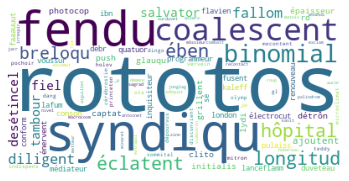

In [65]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud.WordCloud(
    background_color = 'white', 
    max_words=100,
    max_font_size=100).generate_from_frequencies(mean_df.to_dict(orient="dict")[0]))
plt.axis('off')

In [44]:
for i,story in enumerate(corpus) :
    if "rototos" in story :
        print(title[i])

La Horde du Contrevent - Alain Damasio.txt


In [38]:
corpus[23]

'Avertissement : La version papier originale comporte une numérotation décroissante des pages. Cette numérotation à rebours est partie prenante de la narration et trouve sa justification à la fin du livre – donc à la page 1.\n\n\n\nCette version numérique ne reprend pas cette numérotation pour des raisons techniques, et car certaines liseuses cachent désormais la numérotation des pages que l’on trouvait en marge de l’epub.\n\nCet avertissement a pour vocation de permettre au lecteur de garder à l’esprit cette évolution « à rebours » et la signification finale qui en résultera.\n\n\n\nLes Hérétiques\n\n\n\n\n\nAlain Damasio\n\n\n\n\nLa Horde\n\ndu Contrevent\n\n\n\n\n\nHérétiques – créateurs de livrels indépendants.\n\n\n\n\n\nÀ la mémoire de Mamu, ma grand-mère,\n\nQui m’a laissé au coeur et aux poumons,\n\ncette braise ronde de pur amour,\n\nQue j’essaie de rallumer,\n\nAvec mes pauvres moyens,\n\nà chaque respiration.\n\n\n\n\n\nCe livre t’est dédié de plein droit, Olivier,\n\nIl est

In [113]:
pd.set_option('display.max_rows', 300)

In [17]:
df = pd.DataFrame(X.toarray(),columns = dico)
df["output"] = y

In [18]:
X_train = df.drop(columns=["output"])
y_train = df["output"]

In [20]:
from interpret.glassbox import LogisticRegression

In [21]:
clf = LogisticRegression(penalty="l1",solver="liblinear").fit(X_train, y_train)

In [23]:
import numpy as np
from wordcloud import wordcloud

In [24]:
 ### Pour le nuage de mot
seed=42    
lr = LogisticRegression(random_state=seed, penalty='l1', solver='liblinear')
    
lr.fit(X_train, y_train)

lr_global = lr.explain_global(name="Logistic Regression")

    
words = X_train.columns
scores = lr_global.data()["scores"]

res = {words[i]: scores[i] for i in range(len(words))}


idx_1 = np.array(scores) > 0
words_selected_1 = words[idx_1]

words_1 = {key: res[key] for key in words_selected_1}
wc1 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_1)

idx_2 = np.array(scores) < 0
words_selected_2 = words[idx_2]

words_2 = {key: res[key]*-1 for key in words_selected_2}
wc2 = wordcloud.WordCloud(
    background_color = 'white', 
    max_words=200,
    max_font_size=100).generate_from_frequencies(words_2)


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [ ]:
plt.imshow(wc1)
plt.axis('off')

In [ ]:
plt.imshow(wc2)
plt.axis('off')